# With SentencePiece tokenizer

## Initial setup

In [43]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [44]:
from fastai import *
from fastai.text import *

In [45]:
bs = 256

In [46]:
data_path = Config.data_path()
lang = 'nl'
name = f'{lang}wiki_sp' # Use a different directory.
path = data_path/name
path.mkdir(exist_ok=True, parents=True)
lm_fns = [f'{lang}_wt', f'{lang}_wt_vocab']

## Download wikipedia data

In [47]:
from nlputils import split_wiki,get_wiki

In [48]:
get_wiki(path, lang)

/storage/nlwiki_sp/nlwiki already exists; not downloading


In [49]:
path.ls()

[PosixPath('/storage/nlwiki_sp/wikiextractor'),
 PosixPath('/storage/nlwiki_sp/nlwiki-latest-pages-articles.xml'),
 PosixPath('/storage/nlwiki_sp/nlwiki'),
 PosixPath('/storage/nlwiki_sp/docs'),
 PosixPath('/storage/nlwiki_sp/models'),
 PosixPath('/storage/nlwiki_sp/copy_docs.py')]

### Split in separate files

In [50]:
dest = split_wiki(path, lang)

/storage/nlwiki_sp/docs already exists; not splitting


In [51]:
dest.ls()[:5]

[PosixPath('/storage/nlwiki_sp/docs/Theophanu.txt'),
 PosixPath('/storage/nlwiki_sp/docs/Witte dovenetel.txt'),
 PosixPath('/storage/nlwiki_sp/docs/Vorstendom Saksen-Hildburghausen.txt'),
 PosixPath('/storage/nlwiki_sp/docs/Sylvain Poons.txt'),
 PosixPath('/storage/nlwiki_sp/docs/Palmach.txt')]

## Create databunch for language model

In [52]:
data = (TextList.from_folder(dest, processor=[OpenFileProcessor(), SPProcessor()])
       .split_by_rand_pct(0.1, seed=42)
       .label_for_lm()
       .databunch(bs=bs, num_workers=1))
data.save(f'{lang}_databunch_sp')  # Different databunch
len(data.vocab.itos),len(data.train_ds)

(30000, 20234)

In [53]:
# data.train_ds[:5]

In [54]:
# data.show_batch()

## Train language model

In [55]:
data = load_data(dest, f'{lang}_databunch_sp', bs=bs, num_workers=1)

In [56]:
# data.train_ds[:1]

In [58]:
# learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5, pretrained=False).to_fp16()
# learn = language_model_learner(data, AWD_LSTM, drop_mult=1.0, pretrained=False)
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [59]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


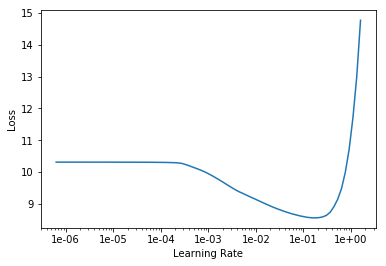

In [60]:
learn.lr_find()
learn.recorder.plot()

In [34]:
lr = 1e-2

In [61]:
# learn.fit_one_cycle(1, lr, moms=(0.8, 0.7))

In [ ]:
learn.fit_one_cycle(10, lr, moms=(0.8, 0.7))
# learn.fit_one_cycle(5, lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.727635,4.705405,0.257645,14:46
1,4.192041,4.226868,0.287183,14:48
2,4.072420,4.110917,0.295557,14:48
3,3.973411,4.003163,0.305398,14:48
4,3.869847,3.911924,0.314261,14:48
5,3.742104,3.823921,0.323439,14:48
6,3.646791,3.739624,0.332859,14:47
7,3.554666,3.675453,0.340242,14:48
8,3.426699,3.644755,0.344291,14:48


In [36]:
mdl_path = path/'models'
mdl_path.mkdir(exist_ok=True)
# learn.to_fp32().save(mdl_path/lm_fns[0], with_opt=False)
learn.save(mdl_path/lm_fns[0], with_opt=False)
learn.data.vocab.save(mdl_path/(lm_fns[1] + '.pkl'))

In [37]:
TEXT = "In zijn laatste roman"
N_WORDS = 40
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In zijn laatste roman ▁xxmaj ▁de ▁xxmaj ▁groep ▁was ▁een ▁xxmaj ▁belgische ▁zendings dienst ▁die ▁uit ▁de ▁xxmaj ▁staf ▁is ▁van ▁de ▁xxmaj ▁lockheed ▁xxmaj ▁bahn ▁en ▁de ▁xxmaj ▁japanse ▁muziek ▁van ▁xxmaj ▁ row y ▁xxmaj ▁woman . ▁xxmaj ▁de ▁xxmaj ▁ierse ▁xxup
In zijn laatste roman ▁xxmaj ▁het ▁xxmaj ▁ erp ▁xxup ▁( ava us ) ▁is ▁een ▁voormalige ▁xxmaj ▁amerikaanse ▁ boulevard ▁en ▁ligt ▁voor ▁de ▁xxmaj ▁franse ▁gemeenschap ▁in ▁de ▁xxmaj ▁engelstalige ▁provincie ▁xxmaj ▁utrecht . ▁xxmaj ▁het ▁is ▁een ▁van ▁de ▁12 e


In [38]:
learn.predict?

In [39]:
# learn = language_model_learner(data, AWD_LSTM, drop_mult=1., 
#                                   path = path, 
#                                   pretrained_fnames=lm_fns)
learn.export()

In [42]:
TEXT = '''xxbos '''
N_WORDS = 500
N_SENTENCES = 1

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

xxbos  ▁xxmaj ▁minsk ▁( b al ieur ) ▁xxmaj ▁ sharif ▁xxmaj ▁me bus ▁( ro e ke ) ▁xxmaj ▁the ▁xxmaj ▁ an ▁xxmaj ▁ ultimate ▁xxmaj ▁believe ▁is ▁een ▁xxmaj ▁britse ▁animatiefilm ▁die ▁verscheen ▁aan ▁een ▁fusie ▁met ▁xxmaj ▁ ly sa ▁xxmaj ▁ bogey . ▁xxmaj ▁de ▁film ▁haalde ▁in ▁april ▁2009 ▁het ▁album ▁" the ▁xxmaj ▁ board " ▁dat ▁vóór ▁de ▁tweede ▁maal ▁in ▁het ▁laatste ▁seizoen ▁van ▁de ▁première ▁kwam , ▁de ▁xxmaj ▁kas ku san . ▁xxmaj ▁de ▁band ▁kwam ▁in ▁1950 ▁uit ▁voor ▁de ▁xxmaj ▁ hochschule ▁ compilatie - serie , ▁waardoor ▁de ▁tekst ▁kwam ▁voor ▁de ▁tweede ▁maal ▁in ▁een ▁single . ▁xxmaj ▁zij ▁vond ▁een ▁gedistribueerd ▁exemplaar ▁en ▁ging ▁in ▁de ▁geschiedenis ▁van ▁de ▁xxmaj ▁ se gunda ▁xxmaj ▁división ▁xxup ▁b . ▁xxmaj ▁de ▁band ▁werd ▁in ▁september ▁1957 ▁opgericht ▁in ▁het ▁xxmaj ▁ o ah ock s . ▁xxmaj ▁de ▁plaat ▁is ▁onder ▁meer ▁geschreven ▁door ▁xxmaj ▁ jeremy ▁xxmaj ▁ hack is ▁en ▁xxmaj ▁marten ▁xxmaj ▁caine , ▁die ▁de ▁naam ▁" the ▁xxmaj ▁great ▁xxmaj ▁king s " ▁heeft ▁ge

In [38]:
data_path

PosixPath('/storage')